<a href="https://colab.research.google.com/github/NathVM/GA/blob/main/NXGraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Measuring performance of Graph Analytics Algorithms using NetworkX graphs

Imports : 

In [2]:
import networkx as nx
import pandas as pd

Dataset: 

https://networkrepository.com/TWITTER-Real-Graph-Partial.php

Shared in the google drive : 

https://drive.google.com/drive/folders/113gZK1io1MZGogAULYoBdrlEUHyJcxRh?usp=sharing 

---



In [7]:
from google.colab import drive
drive.mount('/content/drive')

# Map the shared folder 
# https://drive.google.com/drive/folders/113gZK1io1MZGogAULYoBdrlEUHyJcxRh?usp=sharing 
# to your google drive and modify the file path accordingly
file = "/content/drive/MyDrive/Dataset/share/GA/TWITTER-Real-Graph-Partial.edges"
df = pd.read_csv(file)
df.rename(columns = {'1':'source', '2':'target'}, inplace = True)
print(df.head(100))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
    source  target
0        2       1
1        3       4
2        4       3
3        3       2
4        2       3
..     ...     ...
95      52      56
96      56      52
97      53      57
98      57      53
99      53      59

[100 rows x 2 columns]


Create graph: 

---



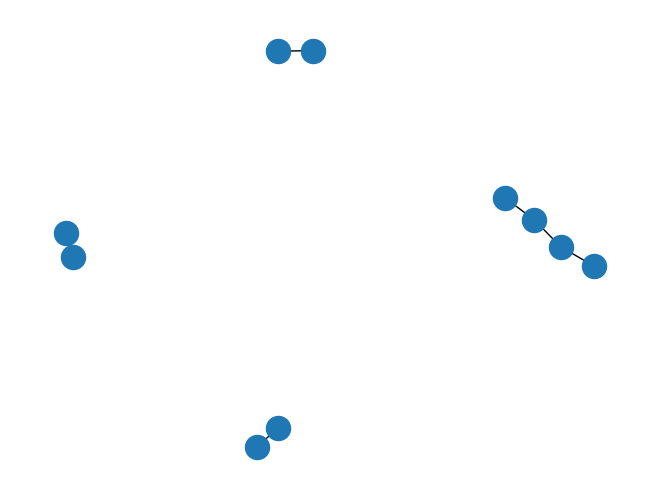

In [6]:
df = df.head(100)
g = nx.from_pandas_edgelist(df,'source','target')
nx.draw(g)